<a href="https://colab.research.google.com/github/Berkay86/DeepPerson/blob/main/S%C4%B1n%C4%B1fland%C4%B1rma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [181]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import string
from numpy import array
from keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer


In [182]:
resturantreviews = pd.read_csv("sentiment (1).csv")
resturantreviews.isnull().values.any()
resturantreviews.shape

(2001, 13)

In [183]:
resturantreviews.head()

,Unnamed: 0,Date,ID,url,username,source,location,tweet,num_of_likes,num_of_retweet,Processed_Tweets,Polarity,Sentiment
0,0,2022-12-13 21:07:15+00:00,1602772160569016321,https://twitter.com/1899Gallego/status/1602772...,1899Gallego,Twitter for iPhone,NaN,@FIFAWorldCup @adidasfootball Messi monster,0,0,messi monster,0.000000,NaN
1,1,2022-12-13 21:07:15+00:00,1602772160464015361,https://twitter.com/Affellariouz/status/160277...,Affellariouz,Twitter for Android,NaN,I don't say may Argentina 🇦🇷 no enter final bu...,0,0,i dont say may argentina no enter final but ma...,0.000000,NaN
2,2,2022-12-13 21:07:15+00:00,1602772160011194368,https://twitter.com/moneyjumpin/status/1602772...,moneyjumpin,Twitter for iPhone,NaN,going back to train at Brighton after being a ...,0,0,going back to train at brighton after being a ...,-0.033333,Negative
3,3,2022-12-13 21:07:15+00:00,1602772159675486210,https://twitter.com/Orlog2verdandi/status/1602...,Orlog2verdandi,Twitter for Android,"Florida, USA",@YaBoiBru @HNS_CFF @Argentina @FIFAWorldCup My...,0,0,cff my same thought,0.000000,NaN
4,4,2022-12-13 21:07:15+00:00,1602772159512055809,https://twitter.com/NickRoj80278654/status/160...,NickRoj80278654,Twitter for iPhone,NaN,@FIFAWorldCup @adidasfootball Last South Ameri...,0,0,last south american team left in the world cup,0.000000,NaN


In [184]:
resturantreviews["tweet"][3]

'@YaBoiBru @HNS_CFF @Argentina @FIFAWorldCup My same thoughts.'

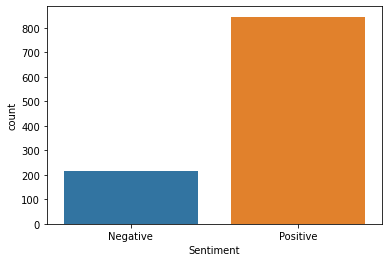

In [185]:
import seaborn as sns
sns.countplot(x='Sentiment', data=resturantreviews)
plt.show()

In [186]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [187]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [188]:
X = []
sentences = list(resturantreviews['tweet'])
for sen1 in sentences:
    X.append(preprocess_text(str(sen1)))

In [189]:
y = resturantreviews['Sentiment']
y = np.array(list(map(lambda x: 1 if x=="Positive" else 0, y)))
y

array([0, 0, 0, ..., 1, 1, 1])

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [191]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [192]:
vocab_size = len(tokenizer.word_index) + 1

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [193]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [194]:
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [195]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [196]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(model.summary())

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 100, 100)          513900    
                                                                 
 flatten_4 (Flatten)         (None, 10000)             0         
                                                                 
 dense_10 (Dense)            (None, 1)                 10001     
                                                                 
Total params: 523,901
Trainable params: 10,001
Non-trainable params: 513,900
_________________________________________________________________
None


In [197]:
history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)


Epoch 1/6
10/10 [==============================] - 2s 24ms/step - loss: 0.6673 - acc: 0.5906 - val_loss: 0.6610 - val_acc: 0.6594
Epoch 2/6
10/10 [==============================] - 0s 11ms/step - loss: 0.5964 - acc: 0.6945 - val_loss: 0.6452 - val_acc: 0.6719
Epoch 3/6
10/10 [==============================] - 0s 8ms/step - loss: 0.5531 - acc: 0.7414 - val_loss: 0.6253 - val_acc: 0.6687
Epoch 4/6
10/10 [==============================] - 0s 8ms/step - loss: 0.5212 - acc: 0.7773 - val_loss: 0.6266 - val_acc: 0.6750
Epoch 5/6
10/10 [==============================] - 0s 10ms/step - loss: 0.4928 - acc: 0.7906 - val_loss: 0.6218 - val_acc: 0.6906
Epoch 6/6
10/10 [==============================] - 0s 9ms/step - loss: 0.4739 - acc: 0.8125 - val_loss: 0.6246 - val_acc: 0.6750


In [198]:
score = model.evaluate(X_test, y_test, verbose=1)

13/13 [==============================] - 0s 2ms/step - loss: 0.5834 - acc: 0.7232


In [199]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.5833608508110046
Test Accuracy: 0.723192036151886


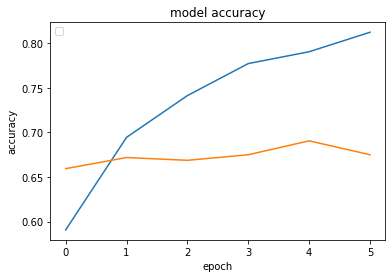

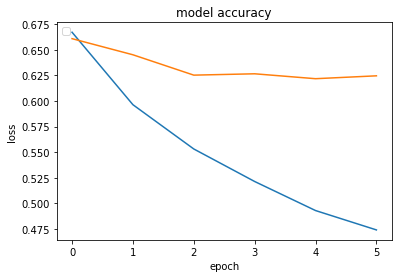

In [200]:
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show()

plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

LSTM EVRİŞİMLİ SİNİR AĞLARI SINIFLANDIRMA

In [201]:

from keras.layers import Conv1D
model = Sequential()

embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)

model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [202]:
print(model.summary())

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 100, 100)          513900    
                                                                 
 conv1d_4 (Conv1D)           (None, 96, 128)           64128     
                                                                 
 global_max_pooling1d_4 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 578,157
Trainable params: 64,257
Non-trainable params: 513,900
_________________________________________________________________
None


In [203]:
history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)
score = model.evaluate(X_test, y_test, verbose=1)

Epoch 1/6
10/10 [==============================] - 2s 127ms/step - loss: 0.6875 - acc: 0.6070 - val_loss: 0.6266 - val_acc: 0.6344
Epoch 2/6
10/10 [==============================] - 1s 107ms/step - loss: 0.5455 - acc: 0.7188 - val_loss: 0.5434 - val_acc: 0.6969
Epoch 3/6
10/10 [==============================] - 1s 109ms/step - loss: 0.4695 - acc: 0.7984 - val_loss: 0.5176 - val_acc: 0.7250
Epoch 4/6
10/10 [==============================] - 1s 110ms/step - loss: 0.4090 - acc: 0.8687 - val_loss: 0.4996 - val_acc: 0.7656
Epoch 5/6
10/10 [==============================] - 1s 109ms/step - loss: 0.3669 - acc: 0.8859 - val_loss: 0.4806 - val_acc: 0.7781
Epoch 6/6
13/13 [==============================] - 0s 13ms/step - loss: 0.4688 - acc: 0.7656


In [204]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.46877574920654297
Test Accuracy: 0.7655860185623169


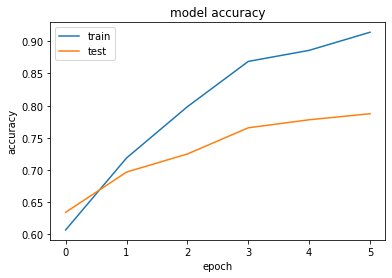

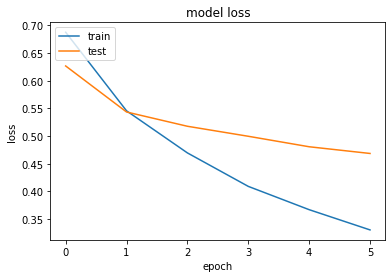

In [205]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

TEKRARLAYAN SİNİR AĞI MODELİ İLE METİN SINIFLANDIRMA

In [206]:
from tensorflow.keras.layers import LSTM
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)
model.add(LSTM(128))

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [207]:
print(model.summary())

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 100, 100)          513900    
                                                                 
 lstm_2 (LSTM)               (None, 128)               117248    
                                                                 
 dense_12 (Dense)            (None, 1)                 129       
                                                                 
Total params: 631,277
Trainable params: 117,377
Non-trainable params: 513,900
_________________________________________________________________
None


In [208]:
history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)
score = model.evaluate(X_test, y_test, verbose=1)

Epoch 1/6
10/10 [==============================] - 6s 419ms/step - loss: 0.6872 - acc: 0.5789 - val_loss: 0.6786 - val_acc: 0.5844
Epoch 2/6
10/10 [==============================] - 6s 646ms/step - loss: 0.6680 - acc: 0.5813 - val_loss: 0.6245 - val_acc: 0.6219
Epoch 3/6
10/10 [==============================] - 4s 405ms/step - loss: 0.6323 - acc: 0.6102 - val_loss: 0.5986 - val_acc: 0.6062
Epoch 4/6
10/10 [==============================] - 3s 349ms/step - loss: 0.5699 - acc: 0.6727 - val_loss: 0.5814 - val_acc: 0.6844
Epoch 5/6
10/10 [==============================] - 4s 354ms/step - loss: 0.5593 - acc: 0.6875 - val_loss: 0.5687 - val_acc: 0.6812
Epoch 6/6
13/13 [==============================] - 1s 58ms/step - loss: 0.5423 - acc: 0.7182


In [209]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.5422806739807129
Test Accuracy: 0.7182044982910156


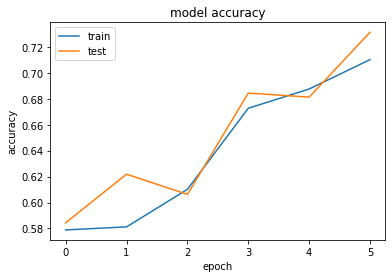

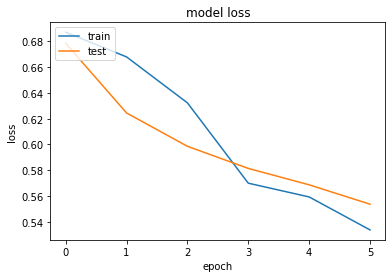

In [210]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [219]:
instance = X[400]
print(instance)

Not sure if should be rooting for the PSG homie KMbappe tomorrow or Morocco as the st African nation to make World Cup Final 


In [220]:
instance = tokenizer.texts_to_sequences(instance)

flat_list = []
for sublist in instance:
    for item in sublist:
        flat_list.append(item)

flat_list = [flat_list]

instance = pad_sequences(flat_list, padding='post', maxlen=maxlen)

model.predict(instance)

1/1 [==============================] - 0s 27ms/step


array([[0.2260171]], dtype=float32)